[*********************100%***********************]  5 of 5 completed


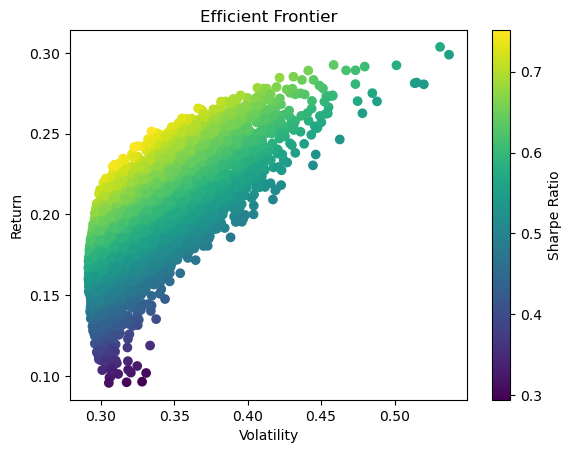

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download historical data for stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

# Calculate log returns
returns = np.log(data / data.shift(1))

# Calculate expected returns, covariance matrix, and number of assets
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_assets = len(tickers)

# Simulate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Portfolio return and volatility
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    
    # Store results: [return, volatility, Sharpe ratio]
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = results[0, i] / results[1, i]

# Plotting the Efficient Frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()


[*********************100%***********************]  5 of 5 completed


Best Sharpe Ratio: 0.7497606243705565
Sharpe Ratio of Equal Portfolio: 0.6032731173773943
Improvement in Sharpe Ratio: 1.24x


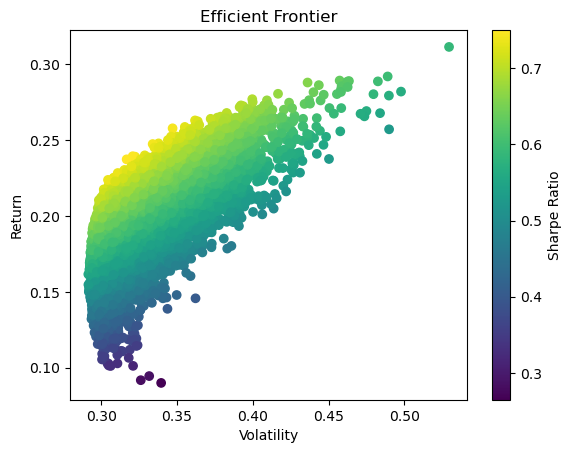

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download historical data for stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

# Calculate log returns
returns = np.log(data / data.shift(1))

# Calculate expected returns, covariance matrix, and number of assets
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_assets = len(tickers)

# Simulate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Portfolio return and volatility
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    
    # Store results: [return, volatility, Sharpe ratio]
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = results[0, i] / results[1, i]

# Calculate the best Sharpe ratio
max_sharpe_ratio = results[2].max()

# Calculate the Sharpe ratio for an equally weighted portfolio
equal_weights = np.ones(num_assets) / num_assets
equal_portfolio_return = np.sum(equal_weights * mean_returns) * 252
equal_portfolio_stddev = np.sqrt(np.dot(equal_weights.T, np.dot(cov_matrix * 252, equal_weights)))
equal_sharpe_ratio = equal_portfolio_return / equal_portfolio_stddev

# Calculate the improvement in Sharpe ratio
sharpe_improvement = max_sharpe_ratio / equal_sharpe_ratio

# Output the results
print(f"Best Sharpe Ratio: {max_sharpe_ratio}")
print(f"Sharpe Ratio of Equal Portfolio: {equal_sharpe_ratio}")
print(f"Improvement in Sharpe Ratio: {sharpe_improvement:.2f}x")

# Plotting the Efficient Frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()
